In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [48]:
# Loading  data
df = pd.read_csv('UCI_Credit_Card_balanced.csv')

The data set is licensed under a [CC0 1.0](https://creativecommons.org/publicdomain/zero/1.0/) licence.

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [50]:
scaler = StandardScaler()

In [51]:
scaler.fit(df.drop('Y',axis=1))

StandardScaler()

In [52]:
scaled_features = scaler.fit_transform(df.drop('Y',axis=1))

In [53]:
X = pd.DataFrame(scaled_features,columns=df.columns[:-1])
y = df['Y']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [55]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [56]:
cart = DecisionTreeClassifier(random_state=69, ccp_alpha=0.00025)      

In [57]:
from sklearn.metrics import plot_confusion_matrix, cohen_kappa_score, plot_roc_curve, accuracy_score, roc_auc_score, precision_recall_curve, confusion_matrix, roc_curve, auc
import shap

In [58]:
t0 = datetime.now()
cart.fit(X_train, y_train)
t1 = datetime.now()
print("Training Time: ", (t1 - t0))

Training Time:  0:00:01.114725


In [59]:
predictions = cart.predict(X_test)

<Figure size 504x360 with 0 Axes>

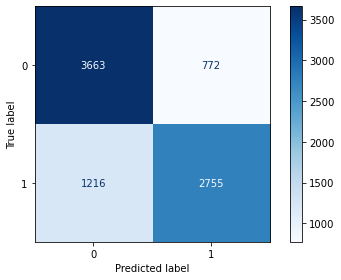

In [60]:
plt.figure(figsize=(7, 5))
ax = plot_confusion_matrix(cart,X_test,y_test,cmap=plt.cm.Blues)

plt.tight_layout()
plt.savefig(r'C:\Users\alanw\OneDrive\Varsity\Research\Paper Itself\LaTeX\images\cart_conf.png')
plt.show()

<Figure size 504x360 with 0 Axes>

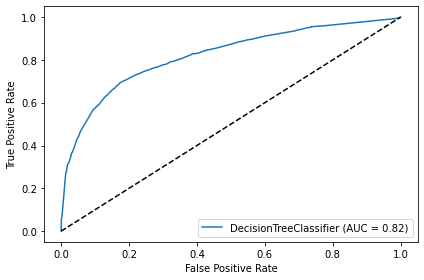

In [61]:
plt.figure(figsize=(7, 5))
ax = plot_roc_curve(cart,X_test,y_test)
x = np.linspace(0, 1, 100)
ax = plt.plot(x, x, linestyle='--',color='black')

plt.tight_layout()
plt.savefig(r'C:\Users\alanw\OneDrive\Varsity\Research\Paper Itself\LaTeX\images\cart_roc.png')
plt.show()

In [62]:
kappa = cohen_kappa_score(y_test, predictions)
print("Cohen's Kappa: %.2f" % (kappa))

Cohen's Kappa: 0.52


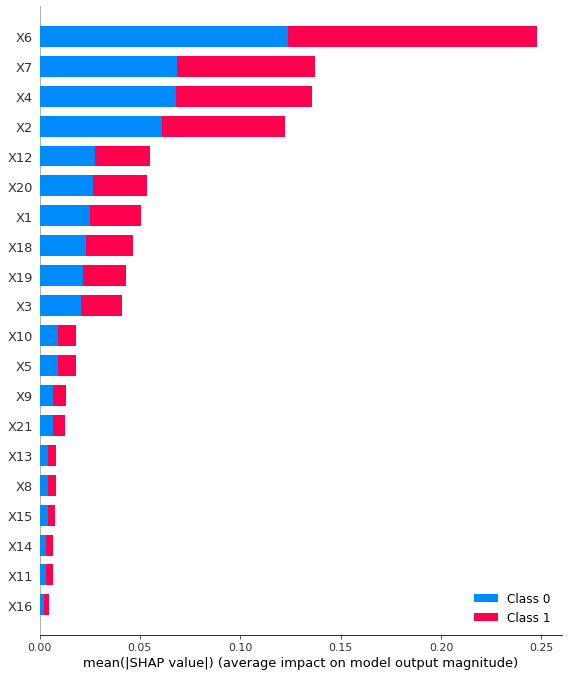

In [63]:
shap_values = shap.TreeExplainer(cart).shap_values(X_train)

plt.figure(figsize=(7, 5))
ax = shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)

plt.tight_layout()
plt.savefig(r'C:\Users\alanw\OneDrive\Varsity\Research\Paper Itself\LaTeX\images\cart_shap.png')
plt.show()


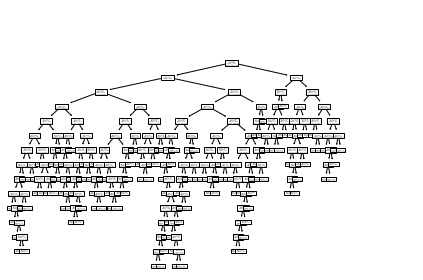

In [65]:
# Plot of full tree
plt.figure()
plot_tree(cart,feature_names=X.columns)
plt.tight_layout()
plt.savefig(r'C:\Users\alanw\OneDrive\Varsity\Research\Paper Itself\LaTeX\images\cart_tree.png')
plt.show()